## Definición del modelo

El modelo utilizado es un perceptrón multicapa definido con la sentencia 
```javascript
 nnNetwork =  new synaptic.Architect.Perceptron(4, 10, 10, 2)
```
Esta estructura consta de 4 neuronas de entrada, dos capas ocultas con 10 neuronas y 2 capas de salida.

Las capas de entrada y de salida son dadas ya que se requieren los siguientes datos:

```javascript
                'input' :  [distanciaBalaX , velocidadBalaX, distanciaBala2Y, velocidadBala2Y],
                'output':  [estatusSalto, estatusDerecha]  
```

 Las capas ocultas fueron probadas hasta dar con ese resultado, puesto que no se tiene una forma correcta de encontrar cuántas capas ocultas y con cuántas neuronas se necesitan para analizar un modelo.

## Obtención de gráficos

 El modelo funciona bien con 480 datos de entrada aproximadamente, a continuación se utiliza la librería de matplotlib y pandas para generar gráficos y observar el comportamiento del modelo, para esto se obtuvieron los datos resultantes de la ejecución del programa y se guardaron en el archivo de datos.csv, el cual estructura los datos de la siguiente manera:

```
-447, -254, 120, 216, 0, 0
-439, -254, 113, 216, 0, 0
-430, -254, 105, 216, 0, 0
-422, -254, 98, 216, 0, 0
-413, -254, 91, 216, 0, 1
-405, -254, 84, 216, 0, 1
```

Primero intentemos graficar los resultados con un gráfico de 2 dimensiones:

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# INGRESO
narchivo = "datos.csv"

# PROCEDIMIENTO
tabla = pd.read_csv(narchivo, sep=';',decimal=',')
n = len(tabla)

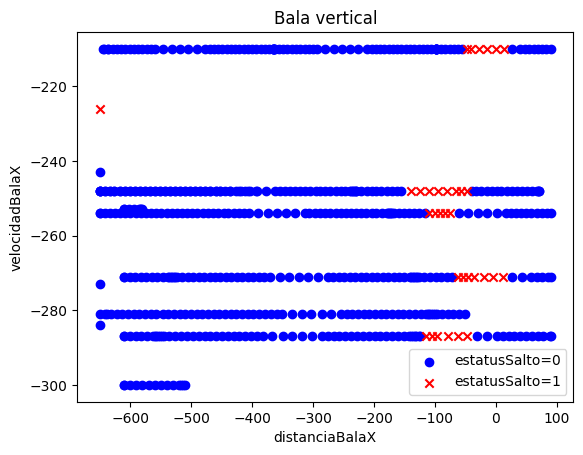

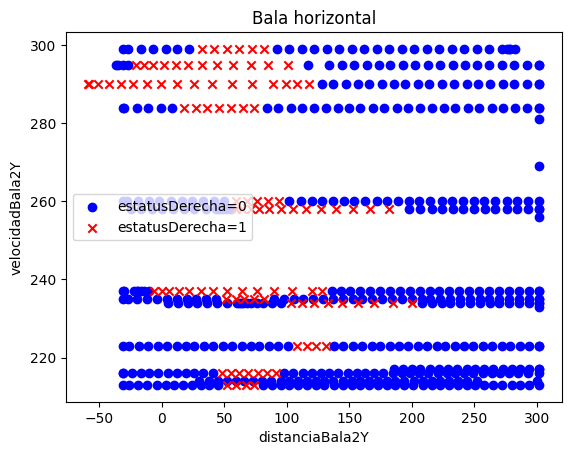

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos desde el CSV
df = pd.read_csv("datos.csv", header=None, names=['distanciaBalaX' , 'velocidadBalaX', 'distanciaBala2Y', 'velocidadBala2Y', 'estatusSalto', 'estatusDerecha'], dtype=int )
plt.figure()

# Graficar los puntos en 2D con colores diferentes para estatusSalto=0 y estatusSalto=1
plt.scatter(df[df['estatusSalto'] == 0]['distanciaBalaX'], df[df['estatusSalto'] == 0]['velocidadBalaX'], color='blue', label='estatusSalto=0', marker='o')
plt.scatter(df[df['estatusSalto'] == 1]['distanciaBalaX'], df[df['estatusSalto'] == 1]['velocidadBalaX'], color='red', label='estatusSalto=1', marker='x')

plt.xlabel('distanciaBalaX')
plt.ylabel('velocidadBalaX')
plt.title("Bala vertical")

plt.legend()
plt.show()

plt.figure()

# Graficar los puntos en 2D con colores diferentes para estatusDerecha=0 y estatusDerecha=1
plt.scatter(df[df['estatusDerecha'] == 0]['distanciaBala2Y'], df[df['estatusDerecha'] == 0]['velocidadBala2Y'], color='blue', label='estatusDerecha=0', marker='o')
plt.scatter(df[df['estatusDerecha'] == 1]['distanciaBala2Y'], df[df['estatusDerecha'] == 1]['velocidadBala2Y'], color='red', label='estatusDerecha=1', marker='x')

plt.xlabel('distanciaBala2Y')
plt.ylabel('velocidadBala2Y')
plt.title("Bala horizontal")

plt.legend()
plt.show()

Aunque en este gráfico puede entenderse cuál es la relación entre la distancia y la velocidad de la bala con la acción del personaje, existen algunas superposiciones de la información, sobre todo en el segundo gráfico, por lo que en estos casos puede ser conveniente el agregar otra dimensión al grafico para poder ver mejor la información:

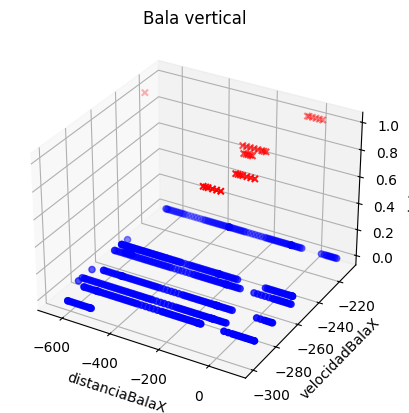

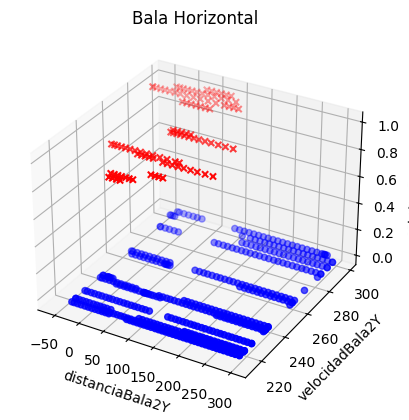

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Cargar los datos desde el CSV
df = pd.read_csv("datos.csv", header=None, names=['distanciaBalaX' , 'velocidadBalaX', 'distanciaBala2Y', 'velocidadBala2Y', 'estatusSalto', 'estatusDerecha'], dtype=int )

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar puntos con estatusSalto=0
ax.scatter(df[df['estatusSalto'] == 0]['distanciaBalaX'], df[df['estatusSalto'] == 0]['velocidadBalaX'], df[df['estatusSalto'] == 0]['estatusSalto'],
           c='blue', marker='o', label='estatusSalto=0')
# Graficar puntos con estatusSalto=1
ax.scatter(df[df['estatusSalto'] == 1]['distanciaBalaX'], df[df['estatusSalto'] == 1]['velocidadBalaX'], df[df['estatusSalto'] == 1]['estatusSalto'],
           c='red', marker='x', label='estatusSalto=1')

# Definir etiquetas de los ejes
ax.set_xlabel('distanciaBalaX')
ax.set_ylabel('velocidadBalaX')
ax.set_zlabel('estatusSalto')
ax.set_title("Bala vertical")

fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')

# Graficar puntos con estatusSalto=0
ax2.scatter(df[df['estatusDerecha'] == 0]['distanciaBala2Y'], df[df['estatusDerecha'] == 0]['velocidadBala2Y'], df[df['estatusDerecha'] == 0]['estatusDerecha'],
           c='blue', marker='o', label='estatusDerecha=0')
# Graficar puntos con estatusSalto=1
ax2.scatter(df[df['estatusDerecha'] == 1]['distanciaBala2Y'], df[df['estatusDerecha'] == 1]['velocidadBala2Y'], df[df['estatusDerecha'] == 1]['estatusDerecha'],
           c='red', marker='x', label='estatusDerecha=1')

# Definir etiquetas de los ejes
ax2.set_xlabel('distanciaBala2Y')
ax2.set_ylabel('velocidadBala2Y')
ax2.set_zlabel('estatusDerecha')
ax2.set_title("Bala Horizontal")

plt.show()

Con ayuda de este gráfico es más fácil ver las relaciones entre los datos obtenidos, se puede observar como en ambos casos mientras menor sea la distancia entre el personaje y la bala, el estatus se pone en 1, tambien puede notarse como la velocidad hace que este valor cambie, puesto que dependiendo de esta el cambio de estatus se realiza antes o después.